## Homework 1: Camera calibration

**Due date:** February 17, 2023

The goal of the assignment is to implement the linear calibration method described in Section 1.3.1 of this [book chapter](https://www.di.ens.fr/%7Eponce/introvis/sbook.pdf).

![calibration-image](img/calibration.jpg)

**Detailed instructions:** The `pts2d` array contains in its columns the (u,v) positions of the image data points (with, by convention, the u and v coordinates with origin at the bottom left of the image, u going right and v going up), while the `pts3d` array contains in its columns the (x,y,z) coordinate vectors of the corresponding 3D points in a right-handed coordinate system. The origin of the world coordinate system is supposed to be in front of the camera, with negative z value.

You should write functions that:
* Compute the 3x4 projection matrix  M estimated from these data using the linear least-squares method of Sec. 1.3.1.
* Compute the corresponding matrix K of intrinsic parameters using the method from M using the method described in the same section.
* Draw together the input image points and the projection of the 3D data points obtained using M to generate a figure like Fig. 1.18, and estimate the root-mean-sqared reprojection error.

You should also write short explanations describing your work and reporting your results.

projection matrix M:
[[-4.53359881e-03 -5.65451256e-04  2.02849590e-03 -5.23179344e-01]
 [-1.84278426e-03  4.15975903e-03 -1.68779276e-03 -8.52192928e-01]
 [-3.25683227e-06 -1.13804182e-06 -3.35237791e-06 -1.43209220e-03]]

intrinsic parameters matrix K:
[[9.70284101e+02 9.86348378e-02 3.72004964e+02]
 [0.00000000e+00 9.63346581e+02 2.99292094e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]



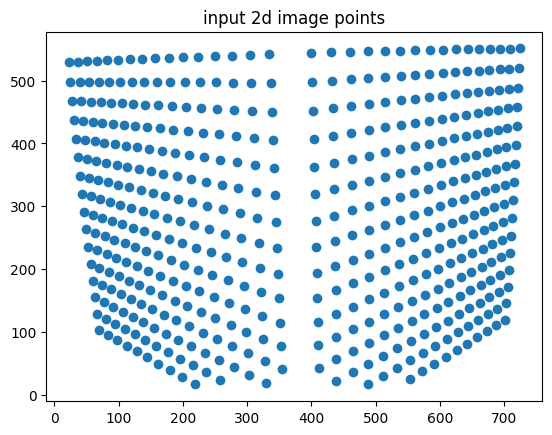

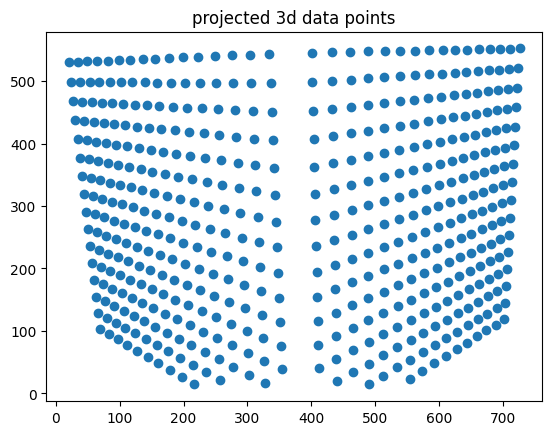

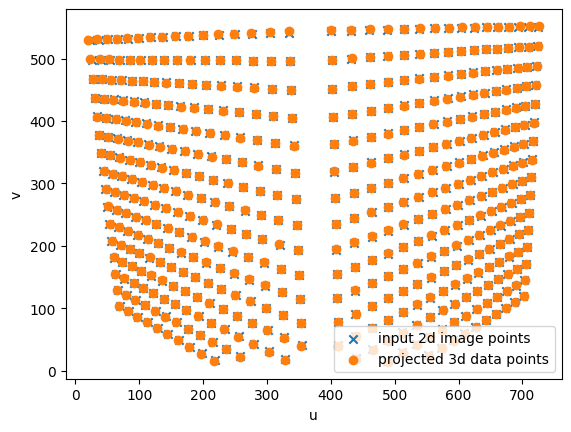

reprojection error:
0.9573541630367266


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

pts2d = np.loadtxt("pts2d.txt")
pts3d = np.loadtxt("pts3d.txt")

def compute_projection_matrix(pts2d, pts3d):
    a = [] # matrix containing equations that determine the camera matrix
    for i in range(pts2d.shape[0]):
        u, v = pts2d[i, :]
        x, y, z = pts3d[i, :]
        a.append([x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u]) # P_1 ^ T, 0 ^ T, -x_1 P_1 ^ T
        a.append([0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v]) # 0 ^ T, P_1 ^ T, -y_1 P_1 ^ T
    a = np.array(a)
    u, s, v = np.linalg.svd(a) # solving for m using singular value decomposition
    return v[-1, :].reshape(3, 4)

def compute_intrinsic_matrix(M):
    a1, a2, a3 = M[:, :3]
    rho = 1 / np.linalg.norm(a3)
    x_0 = rho ** 2 * (a1 @ a3)
    y_0 = rho ** 2 * (a2 @ a3)
    cos = - (np.cross(a1, a3) @ np.cross(a2, a3)) / (np.linalg.norm(np.cross(a1, a3)) * np.linalg.norm(np.cross(a2, a3)))
    sin = np.sqrt(1 - cos ** 2)
    alpha = rho ** 2 * np.linalg.norm(np.cross(a1, a3)) * sin
    beta = rho ** 2 * np.linalg.norm(np.cross(a2, a3)) * sin
    cot = cos / sin
    return np.array([[alpha, -alpha * cot, x_0], [0, beta / sin, y_0], [0, 0, 1]])

def draw_reprojection_error(pts2d, pts3d, M):
    # projecting 3d points to 2d
    pts2d_project = np.matmul(M, np.concatenate([pts3d, np.ones((pts3d.shape[0], 1))], axis = 1).T).T
    pts2d_project = pts2d_project[:, :2] / pts2d_project[:, [2]]

    # calculating the reprojection error
    rmse = np.sqrt(np.mean(np.sum((pts2d - pts2d_project) ** 2, axis = 1)))

    plt.scatter(pts2d[:, 0], pts2d[:, 1])
    plt.title('input 2d image points')
    plt.show()

    plt.scatter(pts2d_project[:, 0], pts2d_project[:, 1])
    plt.title('projected 3d data points')
    plt.show()

    plt.scatter(pts2d[:, 0], pts2d[:, 1], marker = 'x', label = 'input 2d image points')
    plt.scatter(pts2d_project[:, 0], pts2d_project[:, 1], marker = 'o', label = 'projected 3d data points')
    plt.legend()
    plt.xlabel('u')
    plt.ylabel('v')
    plt.show()

    return rmse

if __name__ == '__main__':
    M = compute_projection_matrix(pts2d, pts3d)
    K = compute_intrinsic_matrix(M)

    print("projection matrix M:")
    print(M)
    print()

    print("intrinsic parameters matrix K:")
    print(K)
    print()

    # draw the reprojection error
    error = draw_reprojection_error(pts2d, pts3d, M)
    print("reprojection error:")
    print(error)

camera calibration
compute_projection_matrix(pts2d, pts3d) is a function that computes the 3 x 4 projection matrix M from the data points using the linear least-squares method. matrix `a` is a matrix containing equations that determine the camera matrix

$a = \begin{pmatrix}
P_1 ^ T & 0 ^ T & -x_1 P_1 ^ T\\
0 ^ T & P_1 ^ T & -y_1 P_1 ^ T\\
\vdots & \vdots & \vdots\\ 
\end{pmatrix}$

. its input is 1. pts2d: ndarray with shape (n, 2) array that contains the u, v positions of the image data points and 2. pts3d: ndarray with shape (n, 3) that is an array that contains the x, y, z coordinate vectors of the corresponding 3D points. the output is M: that is a ndarray with shape (3, 4) which is the projection matrix

compute_intrinsic_matrix(M) Computes the intrinsic parameters matrix K from the projection matrix M
    using the method 
    input:
    M: ndarray, shape (3, 4)
        The projection matrix

    output:
    K: ndarray, shape (3, 3)
        The intrinsic parameters matrix